In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
import json
import re     
import os
import glob
from pandas import DataFrame
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Mecab
import numpy as np
import matplotlib as mpl
from wordcloud import WordCloud
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False
from tqdm import tqdm_notebook




### 날짜데이터 정제

In [8]:
## 댓글 파일이 있는 유튜버만 만들어주세요.
df = pd.read_csv('푸드리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list


for name in name_list:
# 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
    df = pd.read_csv(f'{name}/{name}_info.csv')
    
    # column에 Unnames가 새로 생겨서 column 다시 지정해줌
    df.columns = ['', 'name', 'thumbnail', 'view', 'previous_time',
              'video_url', 'start_date', 'comment', 'likes_num', 'unlikes_num', 'time_duration']
    
    # start_date를 리스트로
    date_list = list(df['start_date'])
    
    # 날짜만 뽑아 오는 정규표현식
    p = re.compile("\d{4}[.]\s\d+[.]\s\d+[.]")
    
    # 정규표현식에 맞는 날짜 저장할 리스트
    new_date = []
    
    # 날짜 저장
    for i in range(len(date_list)):
        new_date.append(re.findall(p, date_list[i]))
    
    # 데이터프레임의 start_date 컬럼에 값 저장
    df.loc[:, 'start_date'] = new_date
    
    # info파일 덮어쓰기
    df.to_csv(f'{name}/{name}_info.csv', index = False, encoding = 'utf-8-sig')
    
    print(f'{name} 저장 완료')
    
for name in name_list:
    youtube_channel= name

FRAN 저장 완료
MINEE EATS 저장 완료
SOF 저장 완료
꿀키 저장 완료
나름 저장 완료
떵개떵 저장 완료
문복희 저장 완료
백종원 저장 완료
상윤쓰 저장 완료
아리키친 저장 완료
애주가 저장 완료
엠브로 저장 완료
유디티 저장 완료
입짧은햇님 저장 완료
쯔양 저장 완료
쿠킹트리 저장 완료
푸메 저장 완료
하루한끼 저장 완료
한세 저장 완료
햄지 저장 완료


### 불용어사전 불러오기 및 수정

In [10]:
f= pd.read_csv('불용어사전(한글자).csv',encoding='cp949')
stop_list = list(f)
Unnamed = 'Unnamed: '+ str(len(stop_list)-1)
stop_list.extend(['진짜'])
stop_words = set(stop_list)

stop_words.remove(Unnamed)

# stop_words

# 단어 새로 추가했을 때에 사용!!!
f = open('불용어사전(한글자).csv','w')
for i in stop_words:
    f.write(i+',')
f.close()


### 인코딩 에러뜰 때 순차로 실행('euc-kr' or 'cp949')

In [6]:
# # #인코딩 에러뜰때만 실행
# youtube_channel = input("유투브 채널 이름 입력하시오.")
# date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='cp949')

유투브 채널 이름 입력하시오.떵개떵


In [11]:
# # #인코딩 에러뜰때만 실행


# date.to_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='utf-8-sig',index=False)

## 텍스트 마이닝 시작

현재 유튜버 : FRAN
2020. 6. 2.
2020. 6. 1.
2020. 5. 31.
2020. 5. 29.
2020. 5. 28.
2020. 5. 27.
2020. 5. 26.
2020. 5. 25.
2020. 5. 24.
2020. 5. 23.
2020. 5. 22.
2020. 5. 21.
2020. 5. 20.
2020. 5. 19.
2020. 5. 18.
2020. 5. 17.
2020. 5. 16.
2020. 5. 15.
2020. 5. 14.
2020. 5. 13.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



FRAN date 컬럼 추가 완료


C:\Users\acorn\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


FRANtoken_result 저장 완료


C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:138: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



{'프란님': 342, '언니': 225, '먹방': 159, '맛': 137, '배경': 136, '오늘': 133, '영상': 125, '좋아요': 111, '맛있게': 110, '소리': 88, '벽지': 80, '음식': 78, '라면': 77, '역시': 74, '맛있어': 73, '프란': 68, '보고': 63, '항상': 61, '입': 60, '최고': 60, '표정': 60, '같아요': 57, '치킨': 55, '맛있겠다': 53, '떡볶이': 50, '조합': 48, '김치': 48, '면': 44, '사랑': 44, '도토리': 43}


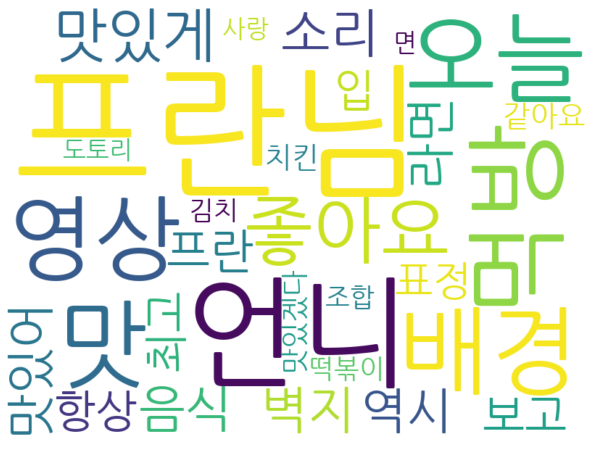

FRANword cloud 저장 완료
현재 유튜버 : MINEE EATS
2020. 5. 17.
2020. 5. 15.
2020. 5. 13.
2020. 5. 11.
2020. 5. 9.
2020. 5. 7.
2020. 5. 5.
2020. 5. 3.
2020. 5. 1.
2020. 4. 29.
2020. 4. 27.
2020. 4. 25.
2020. 4. 23.
2020. 4. 21.
2020. 4. 19.
2020. 4. 17.
2020. 4. 15.
2020. 4. 13.
2020. 4. 11.
2020. 4. 9.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



MINEE EATS date 컬럼 추가 완료
MINEE EATStoken_result 저장 완료



{'미니': 1041, '오늘': 482, '영상': 435, '소리': 319, '별': 279, '젤리': 207, '좋아요': 198, '언니': 146, '음식': 136, '보고': 135, '항상': 135, '입': 127, '치즈': 126, '사랑': 125, '초밥': 121, '먹방': 116, '잇': 115, '같아요': 112, '맛': 102, '맛있겠다': 99, '초콜릿': 98, '맛있어': 98, '정말': 94, '마시멜로우': 91, '맛있게': 89, '임신': 86, '우동': 86, '튀김': 85, '코로나': 84, '댓글': 75}


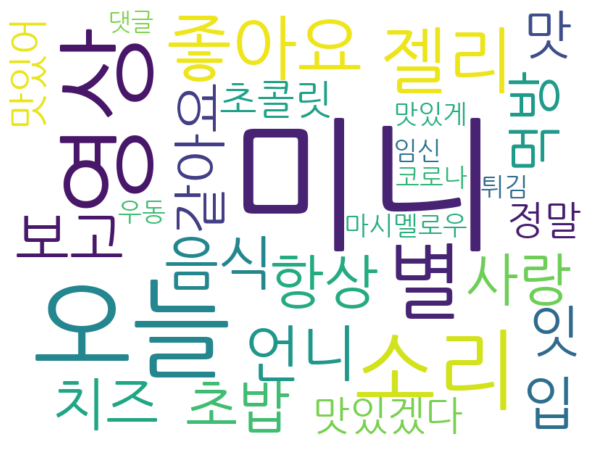

MINEE EATSword cloud 저장 완료
현재 유튜버 : SOF
2020. 5. 29.
2020. 5. 29.
2020. 5. 20.
2020. 5. 7.
2020. 5. 7.
2020. 4. 8.
0
1
2
3
4
5



SOF date 컬럼 추가 완료
SOFtoken_result 저장 완료



{'영상': 236, '소프': 229, '요리': 100, '형': 71, '같아요': 58, '컨텐츠': 55, '느낌': 43, '응원': 39, '생각': 37, '옛날': 34, '보고': 33, '좋아요': 32, '항상': 29, '파니니': 27, '다시': 26, '예전': 24, '음식': 23, '정말': 23, '입니다': 23, '개인': 23, '맛': 22, '편집': 22, '유튜브': 22, '꽃게': 22, '이제': 21, '지금': 21, '좋은': 21, '사람': 21, '집': 20, '그냥': 20}


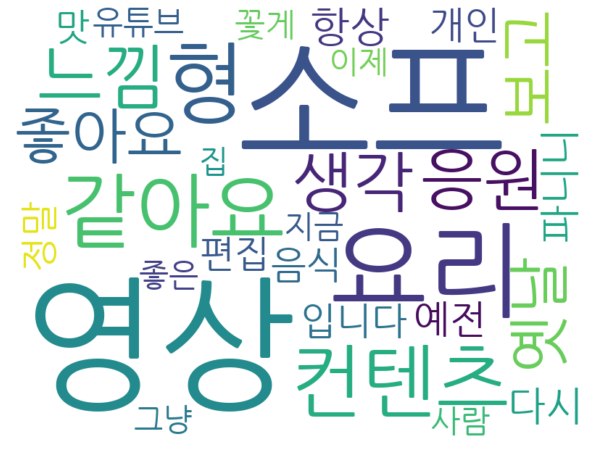

SOFword cloud 저장 완료
현재 유튜버 : 꿀키
2020. 5. 9.
2020. 5. 8.
2020. 4. 25.
2020. 4. 13.
2020. 4. 4.
0
1
2
3
4



꿀키 date 컬럼 추가 완료
꿀키token_result 저장 완료



{'꿀키': 143, '영상': 119, '버섯': 59, '꽈배기': 43, '파스타': 37, '같아요': 36, '소스': 36, '요리': 33, '표고버섯': 33, '원두': 32, '오늘': 32, '호떡': 30, '커피': 29, '믹스': 29, '정말': 27, '맛있어': 27, '보고': 24, '힐링': 22, '혹시': 21, '집': 21, '한번': 19, '생각': 19, '음식': 19, '고기': 19, '맛있어요': 18, '맛': 18, '좋은': 17, '느낌': 16, '표고': 16, '좋아요': 15}


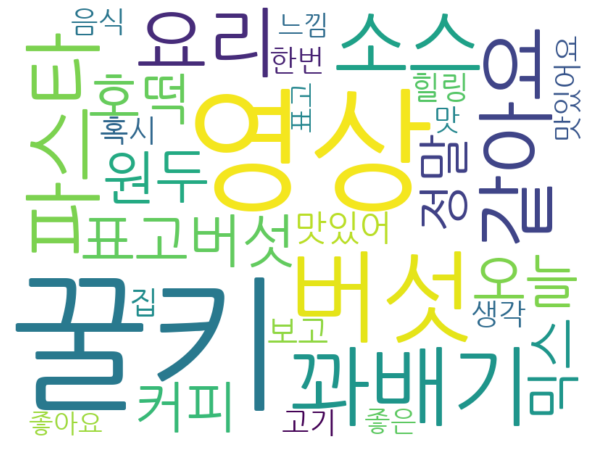

꿀키word cloud 저장 완료
현재 유튜버 : 나름
2020. 6. 4.
2020. 6. 2.
2020. 5. 31.
2020. 5. 28.
2020. 5. 26.
2020. 5. 23.
2020. 5. 20.
2020. 5. 18.
2020. 5. 16.
2020. 5. 14.
2020. 5. 11.
2020. 5. 9.
2020. 5. 7.
2020. 5. 6.
2020. 5. 2.
2020. 4. 29.
2020. 4. 28.
2020. 4. 27.
2020. 4. 25.
2020. 4. 23.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



나름 date 컬럼 추가 완료
나름token_result 저장 완료



{'나름': 1054, '언니': 533, '영상': 315, '오늘': 311, '사랑': 163, '보고': 161, '항상': 151, '맛있게': 150, '먹방': 140, '곱창': 125, '밥': 117, '같아요': 116, '떡볶이': 108, '다름님': 103, '정말': 99, '좋아요': 98, '다름': 96, '꼭': 93, '키르': 91, '라면': 90, '이벤트': 84, '맛': 83, '역시': 77, '맛있어': 72, '맛있겠다': 71, '생각': 70, '한번': 70, '다이어트': 70, '좋은': 70, '시': 66}


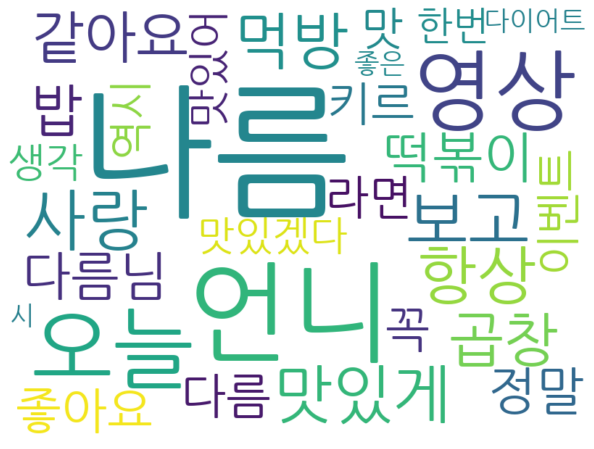

나름word cloud 저장 완료
현재 유튜버 : 떵개떵
['2020. 6. 9.']
['2020. 6. 8.']
['2020. 6. 7.']
['2020. 6. 6.']
['2020. 6. 5.']
['2020. 6. 4.']
['2020. 6. 3.']
['2020. 6. 2.']
['2020. 6. 1.']
['2020. 5. 31.']
['2020. 5. 30.']
['2020. 5. 29.']
['2020. 5. 28.']
['2020. 5. 27.']
['2020. 5. 26.']
['2020. 5. 24.']
['2020. 5. 23.']
['2020. 5. 22.']
['2020. 5. 21.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



떵개떵 date 컬럼 추가 완료
떵개떵token_result 저장 완료



{'떵': 269, '개님': 247, '먹방': 212, '영상': 210, '소리': 193, '오늘': 189, '맛': 141, '맛있겠다': 138, '보고': 128, '입': 128, '맛있게': 127, '치킨': 119, '개': 108, '떵개님': 104, '음식': 99, '밥': 95, '치즈': 92, '닭발': 89, '포도': 89, '사람': 81, '좋아요': 78, '수박': 78, '항상': 72, '그릇': 71, '다이어트': 70, '젤리': 69, '맛있어': 66, '라면': 66, '물회': 64, '요즘': 61}


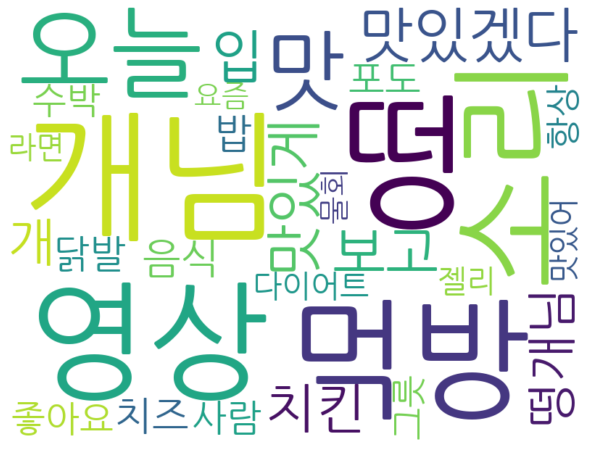

떵개떵word cloud 저장 완료
현재 유튜버 : 문복희
2020. 6. 1.
2020. 5. 30.
2020. 5. 28.
2020. 5. 26.
2020. 5. 24.
2020. 5. 22.
2020. 5. 20.
2020. 5. 18.
2020. 5. 18.
2020. 5. 16.
2020. 5. 14.
2020. 5. 12.
2020. 5. 10.
2020. 5. 8.
2020. 5. 6.
2020. 5. 4.
2020. 5. 2.
2020. 4. 30.
2020. 4. 28.
2020. 4. 26.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



문복희 date 컬럼 추가 완료
문복희token_result 저장 완료



{'복희': 646, '언니': 492, '영상': 240, '먹방': 174, '음식': 170, '오늘': 155, '입': 145, '소리': 136, '댓글': 121, '희': 115, '항상': 114, '자막': 113, '사랑': 103, '맛있게': 95, '메뉴': 86, '보고': 83, '사람': 83, '생각': 83, '맛': 81, '보키': 76, '콩국수': 71, '좋아요': 69, '최고': 59, '밥': 58, '아니': 57, '치킨': 55, '한번': 54, '조합': 54, '드립': 54, '불어': 54}


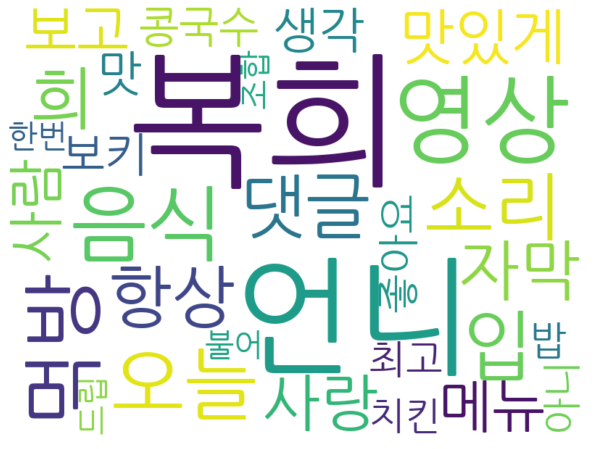

문복희word cloud 저장 완료
현재 유튜버 : 백종원
2020. 6. 2.
2020. 5. 26.
2020. 5. 21.
2020. 5. 20.
2020. 5. 19.
2020. 5. 18.
2020. 5. 13.
2020. 5. 11.
2020. 5. 8.
2020. 5. 7.
2020. 5. 6.
2020. 5. 4.
2020. 4. 30.
2020. 4. 29.
2020. 4. 24.
2020. 4. 23.
2020. 4. 21.
2020. 4. 20.
2020. 4. 16.
2020. 4. 14.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



백종원 date 컬럼 추가 완료
백종원token_result 저장 완료



{'선생님': 282, '백종원': 244, '요리': 211, '맛': 190, '영상': 175, '오늘': 162, '레시피': 126, '소스': 122, '밥': 117, '깍두기': 114, '해먹': 111, '고구마': 110, '집': 109, '정말': 107, '편집': 105, '해': 104, '항상': 103, '입니다': 100, '보고': 98, '짜장': 96, '생각': 94, '대표': 94, '장아찌': 94, '볶음밥': 92, '꼭': 92, '김밥': 88, '유': 80, '간장': 80, '쌤': 76, '한번': 72}


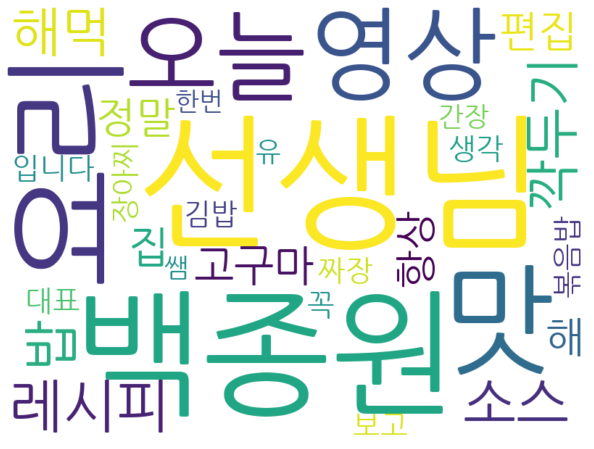

백종원word cloud 저장 완료
현재 유튜버 : 상윤쓰
2020. 5. 28.
2020. 5. 25.
2020. 5. 20.
2020. 5. 19.
2020. 5. 16.
2020. 5. 10.
2020. 4. 26.
2020. 4. 23.
2020. 4. 17.
2020. 4. 14.
2020. 4. 10.
2020. 4. 5.
2020. 4. 1.
0
1
2
3
4
5
6
7
8
9
10
11
12



상윤쓰 date 컬럼 추가 완료
상윤쓰token_result 저장 완료



{'상윤': 466, '귀여워': 173, '영상': 134, '아니': 133, '오빠': 131, '먹방': 114, '오늘': 108, '사람': 80, '여러분': 74, '개': 74, '친구': 65, '말': 60, '댓글': 59, '보고': 55, '소리': 55, '처음': 54, '목소리': 52, '우리': 51, '생각': 51, '그냥': 50, '형': 49, '사랑': 48, '뭔가': 42, '자막': 42, '썸네일': 38, '음식': 37, '항상': 37, '한번': 36, '라면': 31, '얼굴': 31}


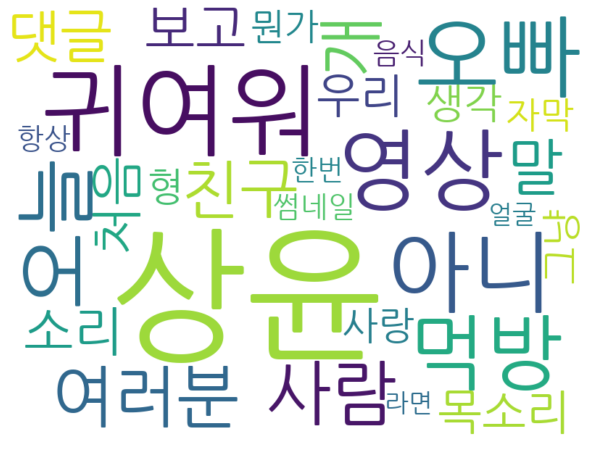

상윤쓰word cloud 저장 완료
현재 유튜버 : 아리키친
2020. 5. 30.
2020. 5. 23.
2020. 5. 22.
2020. 5. 16.
2020. 5. 2.
2020. 4. 25.
2020. 4. 18.
2020. 4. 11.
2020. 4. 4.
0
1
2
3
4
5
6
7
8



아리키친 date 컬럼 추가 완료
아리키친token_result 저장 완료



{'아리': 586, '영상': 218, '언니': 181, '키친': 160, '케이크': 151, '보고': 141, '오늘': 133, '디저트': 89, '마카롱': 84, '정말': 84, '항상': 78, '같아요': 77, '썸네일': 72, '사랑': 67, '맛': 59, '맥주': 47, '머랭': 44, '꼭': 44, '젤리': 40, '좋아요': 40, '대박': 39, '베이': 38, '킹': 37, '좋은': 37, '예뻐요': 37, '요리': 36, '코로나': 36, '쿠키': 34, '썸넬': 34, '이뻐요': 34}


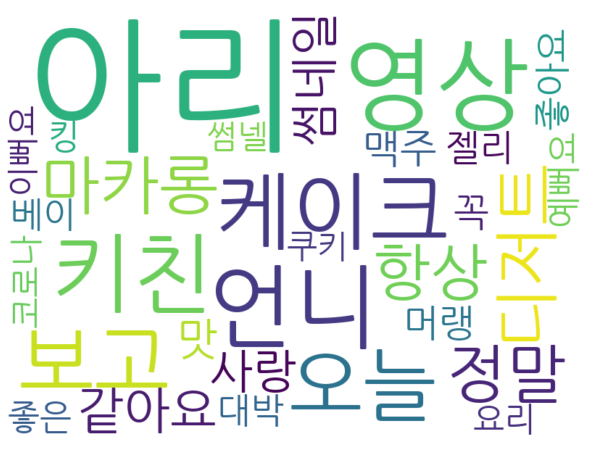

아리키친word cloud 저장 완료
현재 유튜버 : 애주가
2020. 6. 4.
2020. 6. 3.
2020. 6. 2.
2020. 5. 30.
2020. 5. 29.
2020. 5. 28.
2020. 5. 26.
2020. 5. 24.
2020. 5. 23.
2020. 5. 22.
2020. 5. 20.
2020. 5. 19.
2020. 5. 18.
2020. 5. 16.
2020. 5. 16.
2020. 5. 14.
2020. 5. 13.
2020. 5. 12.
2020. 5. 11.
2020. 5. 11.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



애주가 date 컬럼 추가 완료
애주가token_result 저장 완료



{'피디': 304, '영상': 213, '맛': 194, '형': 123, '보고': 121, '오늘': 121, '술': 91, '형님': 89, '게': 81, '꽃게': 73, '좋은': 71, '항상': 70, '민어': 70, '정말': 69, '맛있게': 69, '시간': 68, '소라': 67, '맥주': 64, '입니다': 62, '가격': 58, '주문': 57, '고기': 56, '역시': 56, '바로': 55, '생각': 55, '그냥': 53, '리뷰': 53, '소금': 53, '사람': 50, '집': 50}


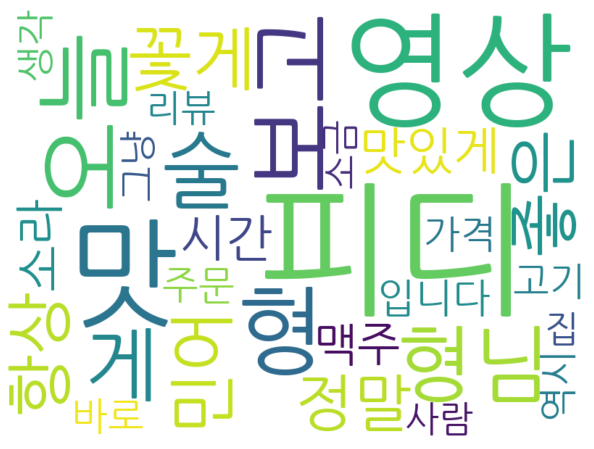

애주가word cloud 저장 완료
현재 유튜버 : 엠브로
2020. 6. 2.
2020. 5. 30.
2020. 5. 26.
2020. 5. 20.
2020. 5. 18.
2020. 5. 16.
2020. 5. 13.
2020. 5. 11.
2020. 5. 8.
2020. 5. 6.
2020. 5. 3.
2020. 4. 29.
2020. 4. 27.
2020. 4. 25.
2020. 4. 23.
2020. 4. 21.
2020. 4. 19.
2020. 4. 16.
2020. 4. 15.
2020. 4. 12.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



엠브로 date 컬럼 추가 완료
엠브로token_result 저장 완료



{'브로': 592, '엠': 412, '슬기': 378, '영상': 297, '먹방': 207, '오늘': 197, '김치': 154, '치즈': 134, '맛': 133, '형': 130, '좋아요': 123, '보고': 118, '불어': 113, '농촌': 111, '사람': 111, '항상': 110, '음식': 105, '맛있게': 105, '소리': 102, '엠브': 101, '입니다': 97, '라면': 90, '같아요': 89, '친구': 88, '조합': 88, '좋은': 85, '대창': 84, '시간': 81, '컨텐츠': 81, '편집자': 79}


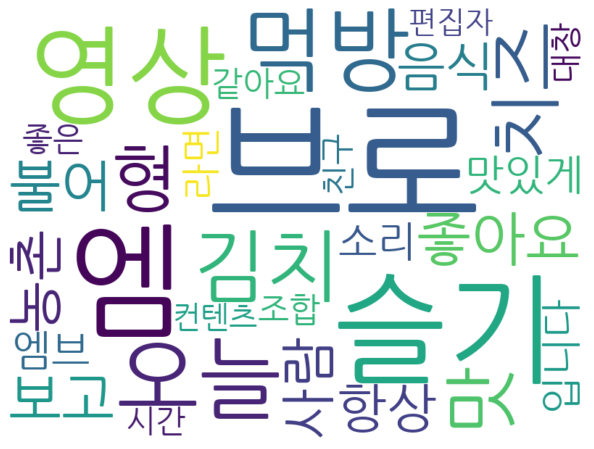

엠브로word cloud 저장 완료
현재 유튜버 : 유디티
2020. 6. 4.
2020. 6. 2.
2020. 5. 31.
2020. 5. 29.
2020. 5. 27.
2020. 5. 25.
2020. 5. 23.
2020. 5. 21.
2020. 5. 19.
2020. 5. 17.
2020. 5. 15.
2020. 5. 13.
2020. 5. 11.
2020. 5. 9.
2020. 5. 7.
2020. 5. 5.
2020. 5. 3.
2020. 5. 1.
2020. 4. 29.
2020. 4. 27.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



유디티 date 컬럼 추가 완료
유디티token_result 저장 완료



{'유디티': 208, '영상': 101, '오늘': 99, '맛있게': 93, '먹방': 89, '입': 81, '맛': 72, '형': 67, '치킨': 58, '음식': 58, '개': 53, '다이어트': 51, '항상': 51, '정말': 50, '사랑': 49, '불닭': 48, '치즈': 47, '보고': 46, '운동': 46, '맛있겠다': 44, '피자': 44, '밥': 43, '시간': 40, '맛있어': 37, '형님': 37, '댓글': 36, '한번': 36, '메뉴': 35, '대리': 32, '소리': 32}


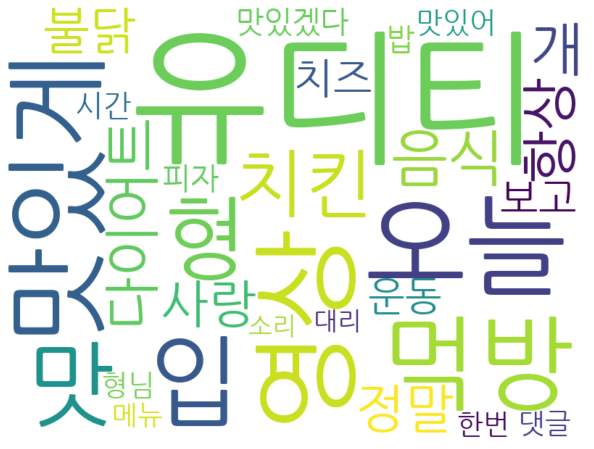

유디티word cloud 저장 완료
현재 유튜버 : 입짧은햇님
2020. 6. 4.
2020. 6. 4.
2020. 6. 3.
2020. 6. 2.
2020. 6. 2.
2020. 6. 1.
2020. 6. 1.
2020. 5. 31.
2020. 5. 30.
2020. 5. 28.
2020. 5. 28.
2020. 5. 27.
2020. 5. 27.
2020. 5. 26.
2020. 5. 25.
2020. 5. 25.
2020. 5. 24.
2020. 5. 23.
2020. 5. 22.
2020. 5. 21.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



입짧은햇님 date 컬럼 추가 완료
입짧은햇님token_result 저장 완료



{'언니': 457, '햇님': 426, '오늘': 173, '라면': 141, '먹방': 123, '보고': 117, '맛': 107, '후식': 107, '입': 106, '방송': 104, '영상': 101, '개': 82, '생방': 73, '정말': 71, '맛있게': 68, '음식': 68, '초밥': 62, '맥윙': 62, '같아요': 58, '참깨': 58, '어제': 56, '사람': 55, '날': 54, '좋아요': 53, '항상': 53, '미사': 52, '축하': 52, '시간': 50, '최고': 48, '떡볶이': 48}


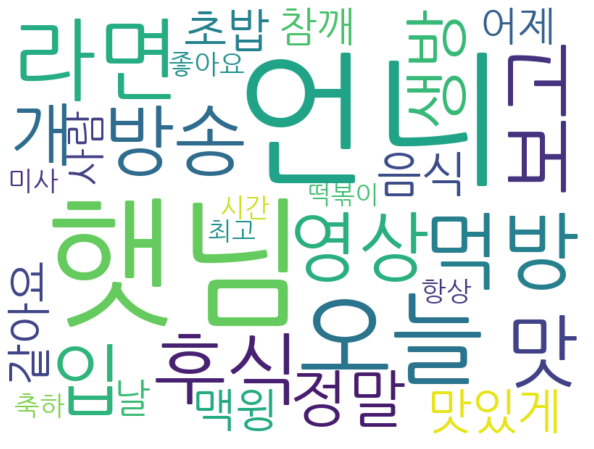

입짧은햇님word cloud 저장 완료
현재 유튜버 : 쯔양
2020. 6. 3.
2020. 6. 1.
2020. 5. 30.
2020. 5. 28.
2020. 5. 26.
2020. 5. 23.
2020. 5. 19.
2020. 5. 16.
2020. 5. 14.
2020. 5. 11.
2020. 5. 9.
2020. 5. 7.
2020. 5. 5.
2020. 5. 3.
2020. 4. 30.
2020. 4. 29.
2020. 4. 27.
2020. 4. 25.
2020. 4. 24.
2020. 4. 22.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



쯔양 date 컬럼 추가 완료
쯔양token_result 저장 완료



{'쯔양': 774, '먹방': 140, '사람': 117, '영상': 115, '개': 101, '생각': 86, '보고': 86, '지코': 80, '항상': 74, '오늘': 70, '맛': 70, '음식': 59, '피자': 58, '역시': 57, '정말': 57, '아니': 55, '언니': 54, '말': 53, '라면': 53, '방송': 53, '귀여워': 51, '맛있게': 49, '좋은': 49, '정도': 48, '생일': 47, '모습': 46, '곱창': 46, '상어': 46, '밥': 45, '치킨': 44}


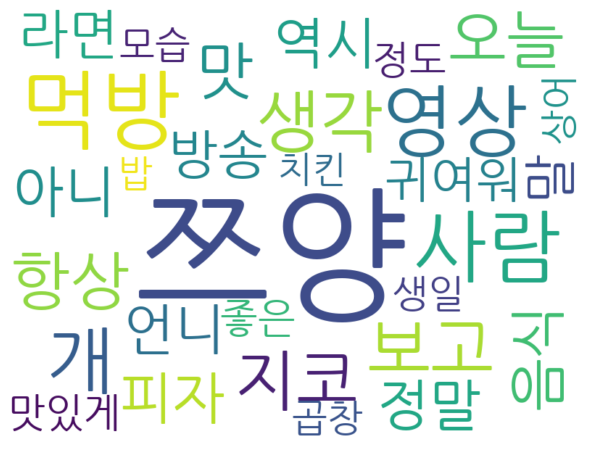

쯔양word cloud 저장 완료
현재 유튜버 : 쿠킹트리
2020. 6. 4.
2020. 6. 2.
2020. 5. 29.
2020. 5. 28.
2020. 5. 26.
2020. 5. 22.
2020. 5. 21.
2020. 5. 19.
2020. 5. 15.
2020. 5. 14.
2020. 5. 12.
2020. 5. 8.
2020. 5. 7.
2020. 5. 5.
2020. 5. 1.
2020. 4. 30.
2020. 4. 28.
2020. 4. 25.
2020. 4. 24.
2020. 4. 23.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



쿠킹트리 date 컬럼 추가 완료
쿠킹트리token_result 저장 완료



{'영상': 168, '트리': 121, '쿠킹': 115, '케이크': 109, '오븐': 95, '레시피': 79, '같아요': 69, '맛': 66, '보고': 63, '정말': 58, '혹시': 54, '딸기': 54, '초코': 54, '좋은': 52, '오늘': 52, '항상': 50, '베이': 47, '꼭': 46, '킹': 43, '계란': 41, '사용': 38, '가루': 36, '자막': 35, '맛있어': 35, '크림': 35, '오레오': 35, '느낌': 34, '맛있겠다': 33, '대신': 32, '우유': 32}


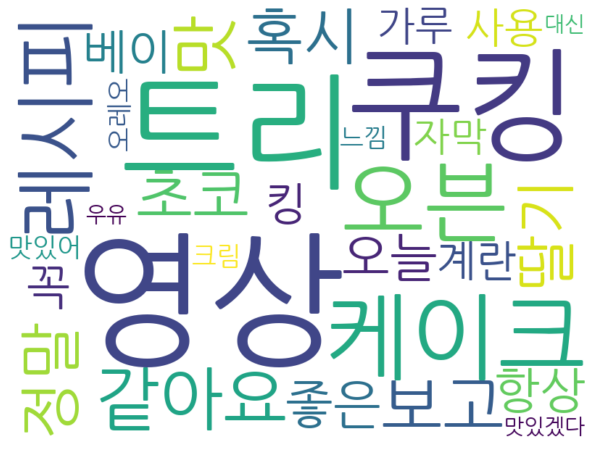

쿠킹트리word cloud 저장 완료
현재 유튜버 : 푸메
2020. 6. 2.
2020. 5. 31.
2020. 5. 29.
2020. 5. 27.
2020. 5. 25.
2020. 5. 23.
2020. 5. 21.
2020. 5. 19.
2020. 5. 17.
2020. 5. 15.
2020. 5. 13.
2020. 5. 11.
2020. 5. 9.
2020. 5. 7.
2020. 5. 5.
2020. 5. 3.
2020. 5. 1.
2020. 4. 29.
2020. 4. 27.
2020. 4. 25.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



푸메 date 컬럼 추가 완료
푸메token_result 저장 완료



{'메': 394, '오늘': 239, '영상': 213, '언니': 145, '맛': 135, '맛있게': 135, '사랑': 115, '먹방': 107, '마라': 99, '같아요': 95, '음식': 94, '연어': 89, '불닭': 76, '항상': 76, '치킨': 75, '탕': 75, '맛있어': 71, '소리': 70, '정말': 70, '조합': 66, '보고': 64, '좋아요': 63, '최고': 55, '달고나': 54, '안녕하세요': 50, '당신': 48, '보': 46, '빵': 46, '완전': 45, '튀김': 44}


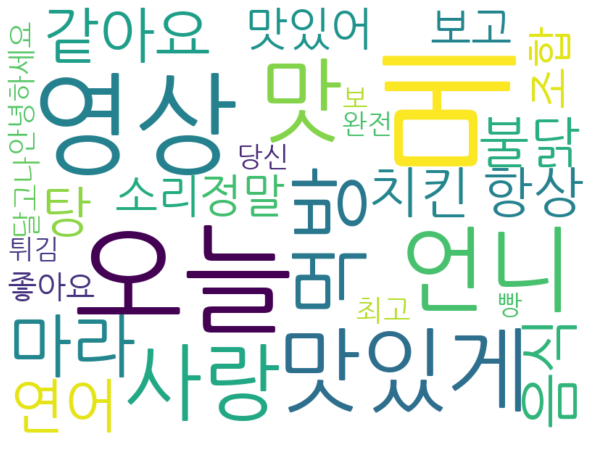

푸메word cloud 저장 완료
현재 유튜버 : 하루한끼
2020. 5. 29.
2020. 5. 22.
2020. 5. 14.
2020. 5. 7.
2020. 4. 30.
2020. 4. 24.
2020. 4. 17.
2020. 4. 11.
2020. 4. 8.
2020. 4. 1.
0
1
2
3
4
5
6
7
8
9



하루한끼 date 컬럼 추가 완료
하루한끼token_result 저장 완료



{'끼': 177, '영상': 143, '대파': 113, '하루': 113, '요리': 88, '오늘': 87, '칼': 87, '계란': 72, '맛': 61, '해먹': 60, '보고': 58, '정말': 54, '라면': 54, '파': 51, '해': 47, '항상': 46, '된거': 45, '재료': 43, '밥': 43, '마지막': 42, '손': 42, '댓글': 41, '이제': 41, '레시피': 40, '딸기': 40, '아니': 39, '맛있어요': 39, '맛있어': 38, '후식': 35, '꼭': 35}


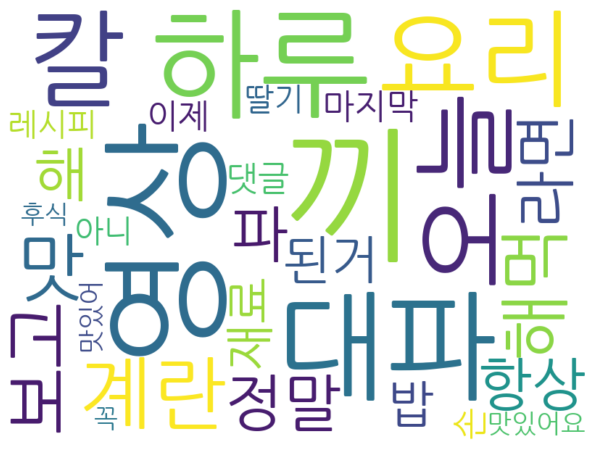

하루한끼word cloud 저장 완료
현재 유튜버 : 한세
2020. 5. 30.
2020. 5. 24.
2020. 5. 16.
2020. 5. 9.
2020. 5. 3.
2020. 4. 25.
2020. 4. 18.
2020. 4. 12.
2020. 4. 5.
0
1
2
3
4
5
6
7
8



한세 date 컬럼 추가 완료
한세token_result 저장 완료



{'세': 398, '영상': 231, '보고': 126, '떡': 104, '오늘': 82, '썸네일': 81, '머랭': 77, '소리': 75, '당근': 59, '버터': 56, '똥': 55, '정말': 53, '펄': 53, '혹시': 52, '같아요': 50, '마지막': 47, '마들렌': 44, '틱톡': 43, '오븐': 43, '틀': 43, '베이': 43, '재료': 42, '킹': 42, '항상': 42, '카페': 41, '사랑': 39, '가루': 38, '좋아요': 38, '설탕': 37, '쿠키': 36}


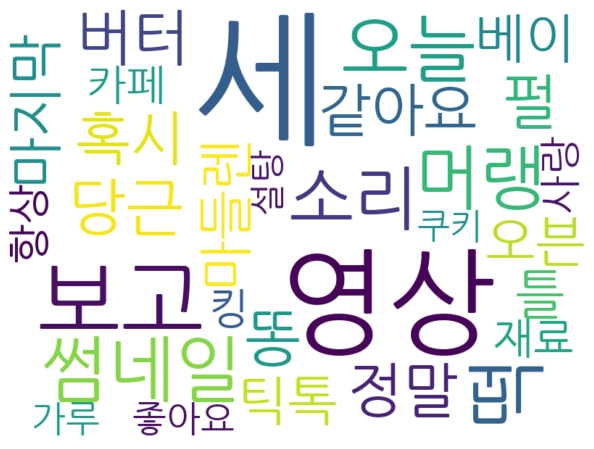

한세word cloud 저장 완료
현재 유튜버 : 햄지
2020. 6. 3.
2020. 6. 1.
2020. 5. 30.
2020. 5. 28.
2020. 5. 26.
2020. 5. 24.
2020. 5. 22.
2020. 5. 20.
2020. 5. 18.
2020. 5. 16.
2020. 5. 14.
2020. 5. 12.
2020. 5. 10.
2020. 5. 8.
2020. 5. 6.
2020. 5. 4.
2020. 5. 2.
2020. 4. 30.
2020. 4. 28.
2020. 4. 26.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



햄지 date 컬럼 추가 완료
햄지token_result 저장 완료



{'햄': 577, '짱': 222, '짜장': 154, '먹방': 122, '영상': 121, '오늘': 107, '요리': 83, '입': 76, '맛': 76, '음식': 75, '언니': 74, '보고': 67, '밥': 62, '김치': 57, '맛있게': 50, '항상': 49, '댓글': 44, '강아지': 43, '질문': 40, '등등': 39, '사람': 37, '집': 36, '최고': 36, '정말': 35, '같아요': 35, '촬영': 34, '때문': 34, '메뉴': 34, '있어요': 33, '홍합': 33}


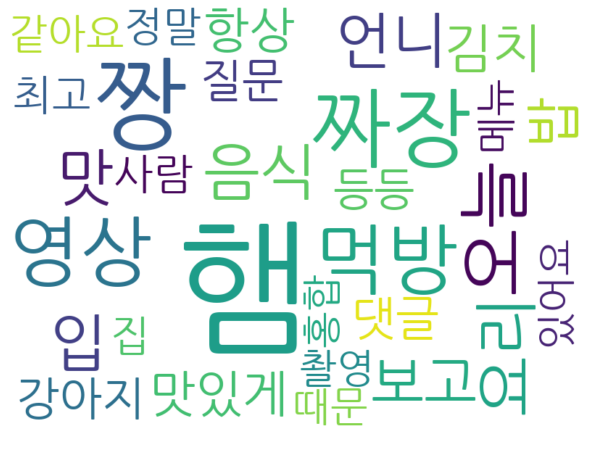

햄지word cloud 저장 완료


In [12]:
# 파일 합치는 곳 (폴더 제목 입력)
# 댓글에 날짜 추가!!!
for youtube_channel in name_list:
#     youtube_channel = input("유투브 채널 이름 입력하시오.")
    youtube_channel = youtube_channel
    print("현재 유튜버 : " + youtube_channel)
#     if youtube_channel :
#     date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
    date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
    ccc = date[date['start_date'] >= '2020. 4. 1']['start_date']

    ccc
    # pd.read_csv('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_[i+1].csv')

    for i in ccc:
         print(i)
    #     a = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))['youtube'].values
    #     np.append(comment_date, a)     up_date = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
    #     comment_date.append(up_date)
    comment_date = []
    for i in range(len(ccc)):
         print(i)
         a = pd.read_csv((youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
         comment_date.append(a)

#     comment_date[0]
    for i in tqdm_notebook(range(len(ccc))):

        df = comment_date[i]
        you_id = df['youtube_id'].values
        co_id = df['comment'].values
        likes = df['like_num'].values
        start_date = ccc[i]
        comment_final = pd.DataFrame(data = {'닉네임':you_id,
                                    '댓글':co_id,
                                    '좋아요수':likes,
                                    '날짜':start_date})
        comment_final.to_csv(youtube_channel+'/comment/'+ youtube_channel +'_comment_date{}.csv'.format(i+1),
                            encoding='utf-8-sig',index=False)    

    print(youtube_channel + ' date 컬럼 추가 완료')

    path =  str(youtube_channel) + "/comment"
    path2 = str(youtube_channel) + '/result.csv'
    arg_youtube = str(youtube_channel) + "*"


    allFile_list = glob.glob(os.path.join(path,arg_youtube))
    #print(allFile_list)
    allData = []
    for file in allFile_list:
        if 'date' in file:
            # print(file)
            df = pd.read_csv(file)
            allData.append(df)

    dataCombine = pd.concat(allData,axis =0, ignore_index = True)

    dataCombine.to_csv(path2, index = False, encoding = 'utf-8-sig')
    cdPath = str(youtube_channel) + '/result.csv'
    comment_data = pd.read_csv(cdPath)
    comment_data ##제대로 출력되는지 확인
    com_list = list(comment_data['댓글'])   ##제대로 출력되는지 확인
    # com_list   ##제대로 출력되는지 확인

    # ### 추출된 단어가 무슨 형태인지 파악
    # # for sentence in com_list:
    # #     morph = twitter.pos(sentence)
    # #     sentences_tag.append(morph)

    # 추출 단어들 저장

    def get_noun(comment_txt):

        twitter = Twitter()
        noun_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Noun']:

                    if word not in stop_words:
                        noun_list.append(word)

        return noun_list

    def get_adj(comment_txt):

        twitter = Twitter()
        adj_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Adjective']:
                    if word not in stop_words:
                        adj_list.append(word)

        return adj_list

    def get_verb(comment_txt):

        twitter = Twitter()
        verb_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Verb']:
                    if word not in stop_words:
                        verb_list.append(word)
        return verb_list

    comment_list = []
    for i in range(len(comment_data)):
        comment_list.append(comment_data['댓글'].iloc[i])

    comment_result = []

    for i in comment_list:
        comment_result.append(i)

    comment_result = pd.DataFrame(comment_result, columns=["comment"])

    #cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
    comment_result['noun'] = comment_result['comment'].apply(lambda x: get_noun(x))
    comment_result['adj'] = comment_result['comment'].apply(lambda x: get_adj(x))
    comment_result['verb'] = comment_result['comment'].apply(lambda x: get_verb(x))

    comment_result.to_csv(youtube_channel +'/{}token_result.csv'.format(youtube_channel),
                                                                       index = False, encoding = 'utf-8-sig')
    print(youtube_channel + 'token_result 저장 완료')

    twitter = Twitter()

    sentences_tag = []
    for sentence in tqdm_notebook(com_list):
         morph = twitter.pos(sentence)
         sentences_tag.append(morph)

    stop_words
    for sentence in comment_data:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
    #     print(morph)
    #     print('-'*30)

    # print(sentences_tag)
    # print(len(sentences_tag))
    # print('\n'*3)

    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun','Adjective','verb']:
                if word not in stop_words:
                    noun_adj_list.append(word)            

    counts = Counter(noun_adj_list)
    select_data = counts.most_common(30)


    wc = WordCloud(font_path='NanumGothic.ttf',max_font_size=200,background_color='white' ,width=800, height=600)

    print(dict(select_data))
    cloud = wc.generate_from_frequencies(dict(select_data))
    plt.figure(figsize=(12, 8))
    plt.axis('off')
    plt.imshow(cloud,interpolation='bilinear')
    plt.show()
    cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
    
    print(youtube_channel + 'word cloud 저장 완료')